# Python Recap

## Compute Prime

In [1]:
def factors(n):
    """Function to compute factors of n"""
    res = []
    for i in range(1, n + 1):
        if n % i == 0:
            res.append(i)
    return res

In [2]:
def prime(n):
    """Function to compute if a number is prime"""
    return factors(n) == [1,n]

In [3]:
prime(2)

True

### List all primes upto m

In [7]:
def primes_upto(m):
    """Function to compute all primes upto m"""
    list_primes = []
    for i in range(1, m + 1):
        if prime(i):
            list_primes.append(i)
    return list_primes

### List first m primes

In [6]:
def first_primes(m):
    """Function to list down all first m primes"""
    (count, i, list_primes) = (0, 1, [])
    while count < m:
        if prime(i):
            (count, list_primes) = (count + 1, list_primes + [i])
        i += 1
    return list_primes

In [9]:
primes_upto(20)

[2, 3, 5, 7, 11, 13, 17, 19]

In [10]:
first_primes(10)

[2, 3, 5, 7, 11, 13, 17, 19, 23, 29]

## Computing the primes

### We can directly find if a number is prime or not, by checking if there exists any factors other than [1,n]. If there are any other factor other than [1,n], then the number is not a prime.

In [11]:
def prime(n):
    """Function to check if current number is a prime or not"""
    result = True
    for i in range(2, n):
        if n % i == 0:
            result = False
    return result

### There is one catch from above code, where if we find atlease one factor, we can break confirm it is not a prime number

In [12]:
def prime(n):
    """Function to check if current number is a prime or not"""
    result = True
    for i in range(2, n):
        if n %i == 0:
            result = False
            break
    return result

### Using while loop, instead of break in for loop

In [13]:
def prime(n):
    """Function to check if current number is a prime or not"""
    (result, i) = (True, 2)
    while result and i < n:
        if n % i == 0:
            result = False
        i += 1
    return result

In [14]:
prime(2)

True

### We can slightly speed up things by finding the factors upto sqrt(n) instead of n.
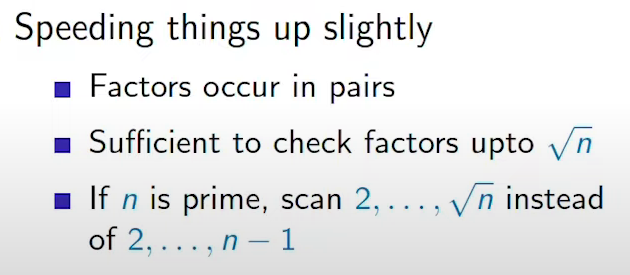

In [21]:
import math
def prime(n):
    """Function to check if current number is a prime or not"""
    (result, i) = (True, 2)
    while result and i <= math.sqrt(n):
        if n % i == 0:
            result = False
        i += 1
    return result

In [22]:
prime(4)

False

### 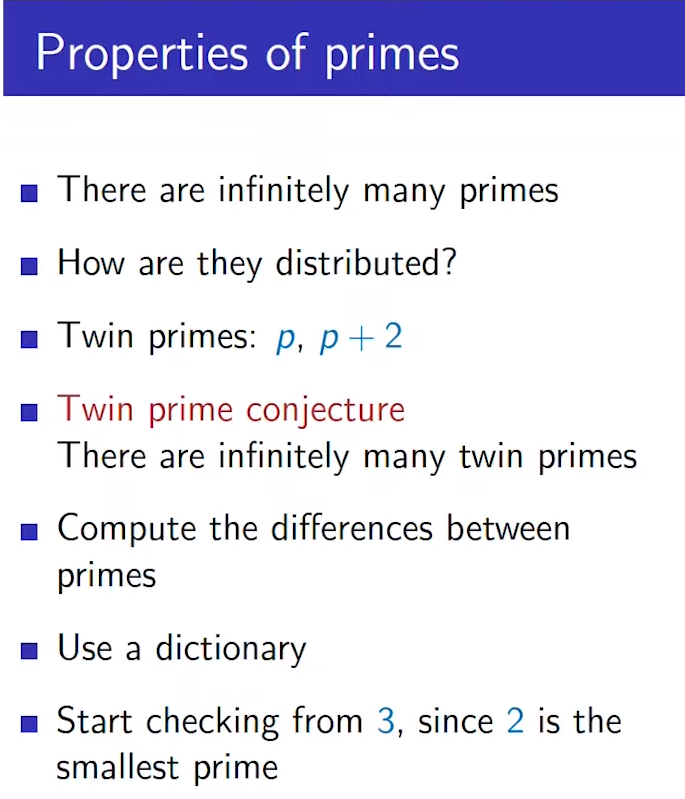

In [23]:
def prime_diff(n):
    """Function to compute the difference between two consequtive primes and capture the frequency"""
    last_prime = 2
    pd = {}
    for i in range(3, n+1):
        if prime(i):
            d = i - last_prime
            last_prime = i
            if d in pd.keys():
                pd[d] = pd[d] + 1
            else:
                pd[d] = 1
    return pd

In [24]:
prime_diff(20)

{1: 1, 2: 4, 4: 2}

In [25]:
primes_upto(20)

[1, 2, 3, 5, 7, 11, 13, 17, 19]

## Compute GCD

In [30]:
def gcd(m,n):
    """Function to compute GCD / HCF of two numbers"""
    common_fact = []
    for i in range(1, min(m,n) + 1):
        if m % i == 0 and n % i == 0:
            common_fact.append(i)
    return common_fact[-1]

In [27]:
def gcd(m,n):
    """Function to compute GCD/HCF of two numbers"""
    for i in range(1, min(m,n) + 1):
        if m % i == 0 and n % i == 0:
            common_fact = i
    return common_fact

In [31]:
gcd(8,16)

8

In [32]:
gcd(8,15)

1

### Another way to think of problem is if m is multiples of a and d (m = ad) and n is multiples of b and d (n = bd), then m -n = (a-b)d. So, d is also a factor of m - n
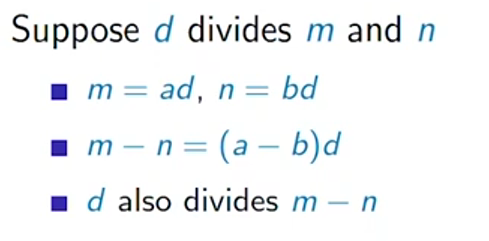

In [45]:
def gcd(m,n):
    """Function to compute GCD / HCF of m and n"""
    sub = max(m,n) - min(m,n)
    for i in range(1, sub + 1):
        if m % i == 0 and n % i == 0:
            common_fact = i
    return common_fact

In [48]:
gcd(25,75)

25

In [49]:
gcd(8,15)

1

### Using Recursive,
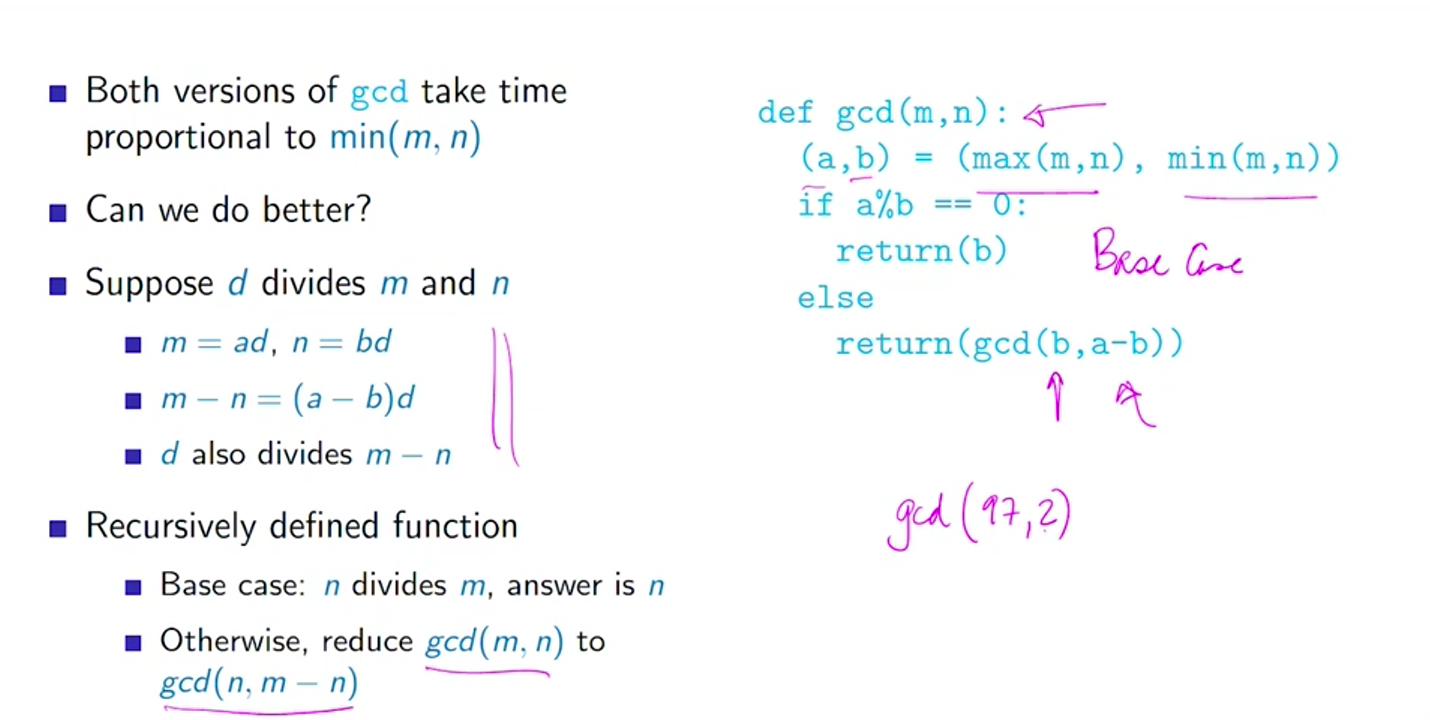

In [51]:
def gcd(m,n):
    (a,b) = (max(m,n), min(m,n))
    if a % b == 0:
        return b
    else:
        return gcd(b, a-b)

In [52]:
gcd(8,15)

1

### Problem with above approach is it takes more time to solve. For inputs, 2 and 9999, it takes 5000 steps to solve the problem
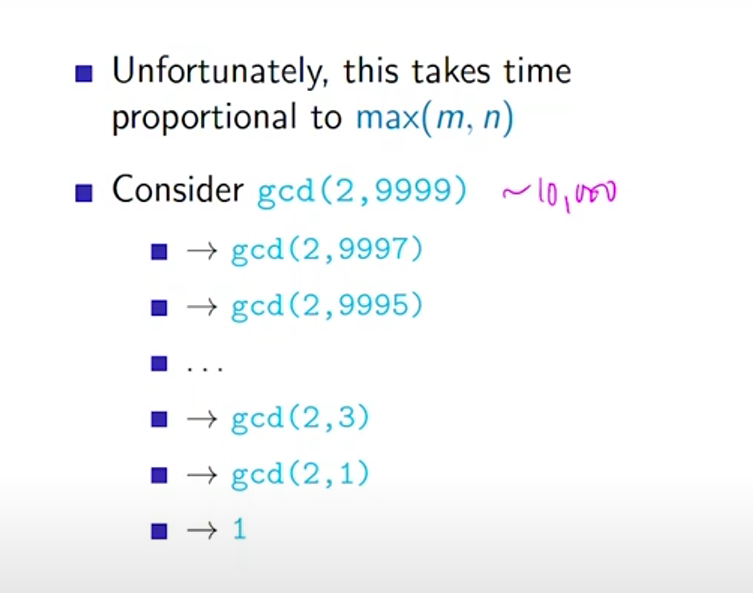

### Euclid's Algorithm
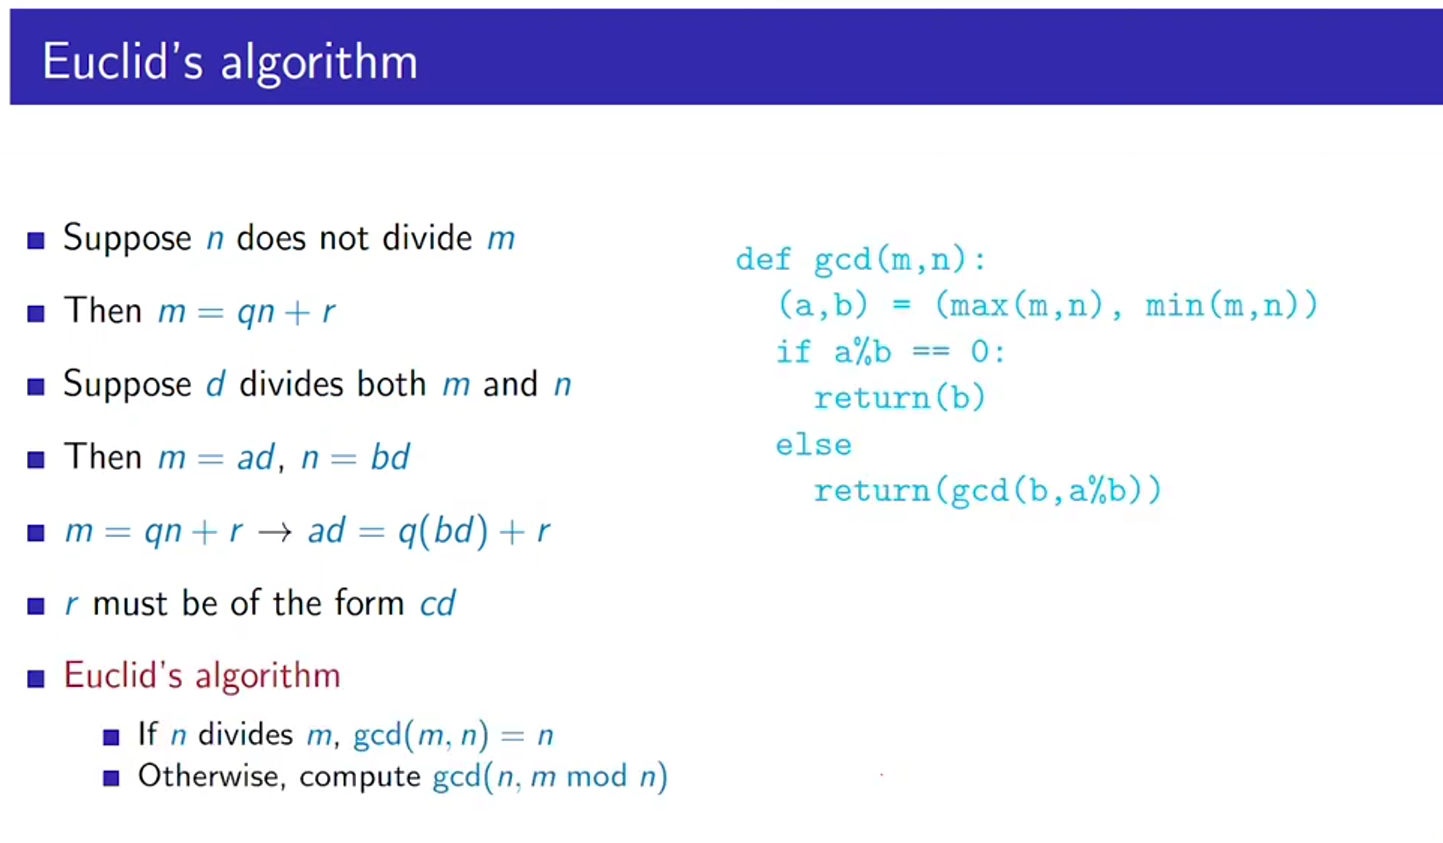

In [53]:
def gcd(m,n):
    """Function to compute GCD / HCF of two numbers"""
    (a,b) = (max(m,n), min(m,n))
    if a % b == 0:
        return b
    else:
        return gcd(b, a %b)

In [54]:
gcd(8,15)

1

## Classes and Objects
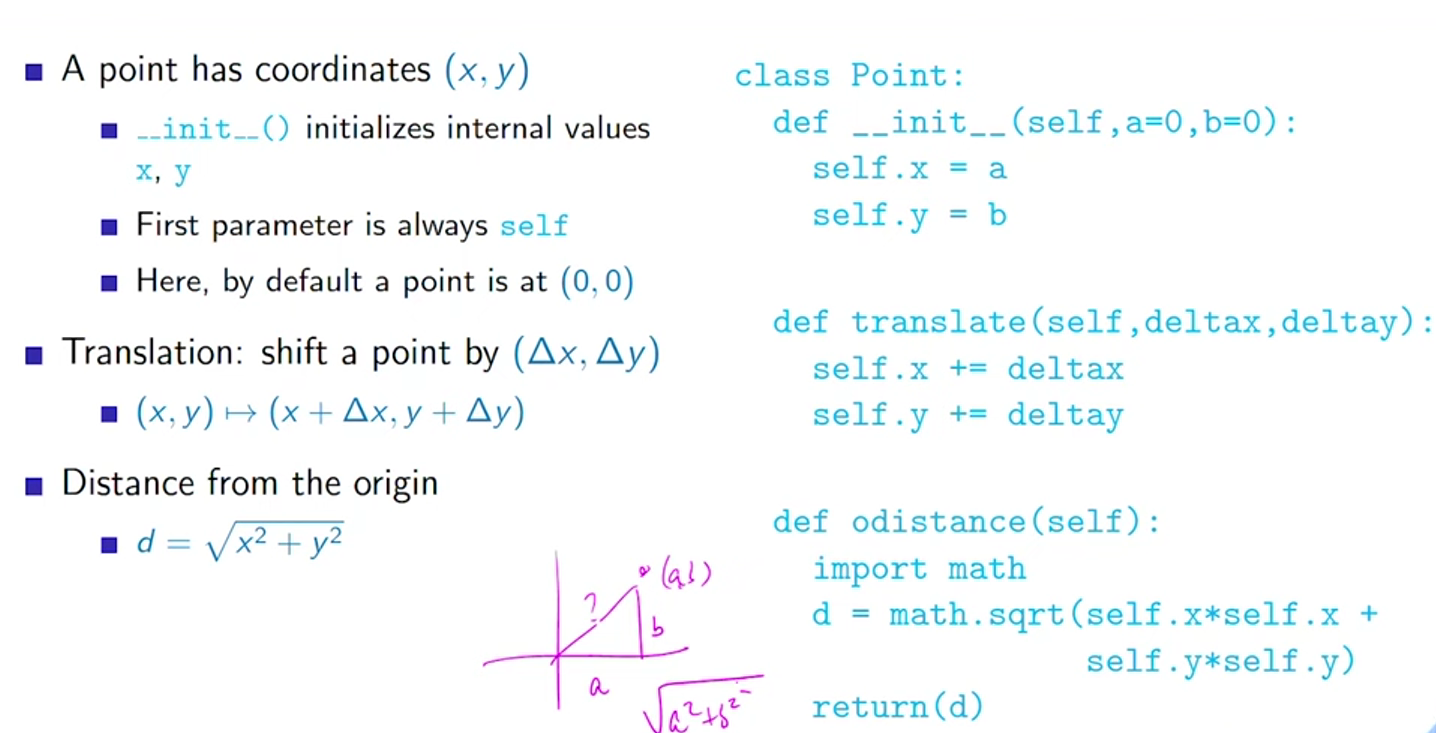
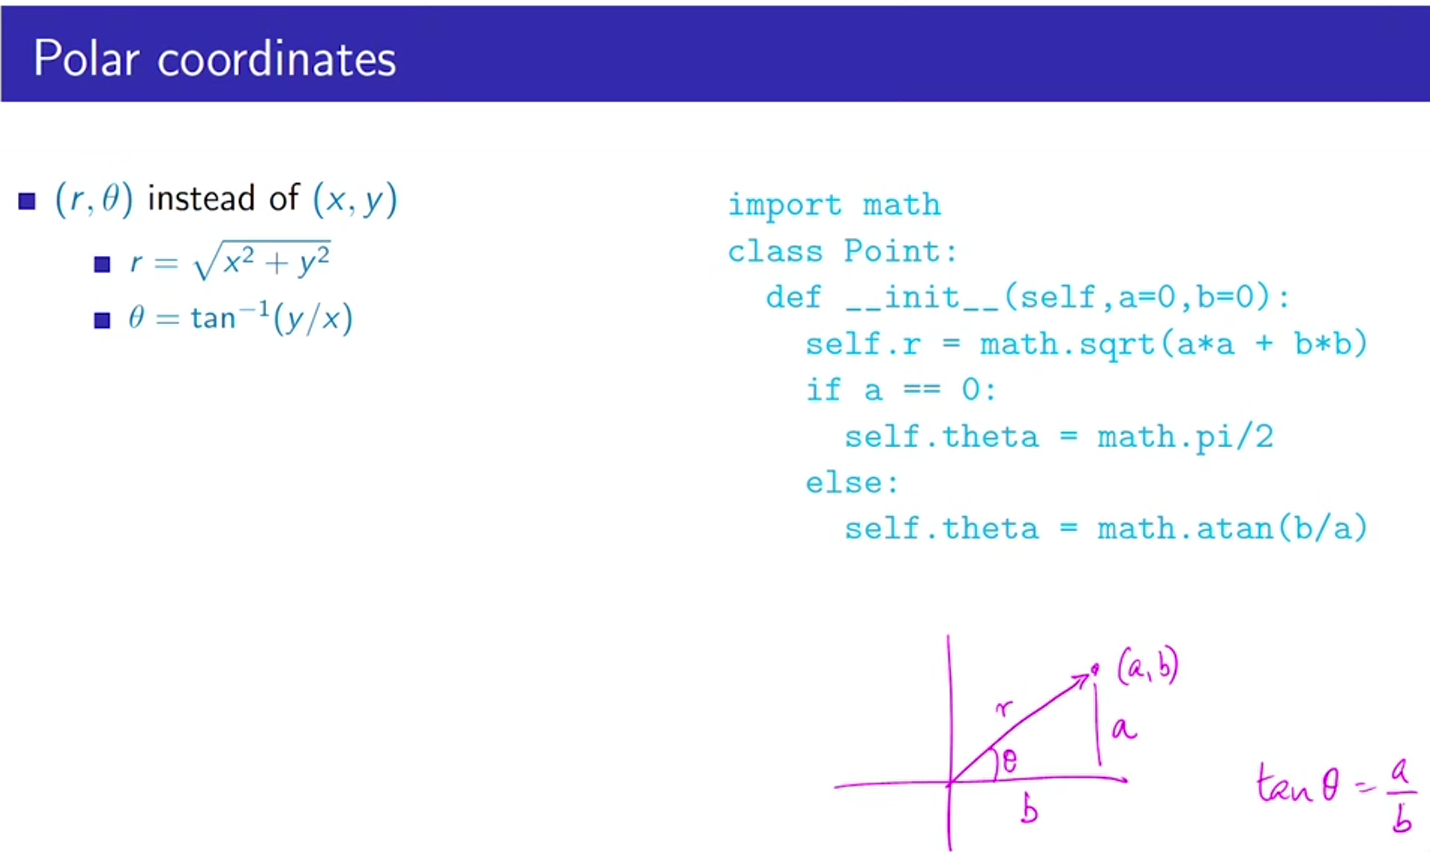

In [55]:
import math
class Point:
    def __init__(self, a = 0, b =0):
        self.x = a
        self.y = b
    # Method to translate a point from (x,y) to (x + deltax, y + deltay)
    def translate(self, deltax, deltay):
        self.x += deltax
        self.y += deltay

    # Method to compute distance from (0,0) to (x, y)
    def odistance(self):
        d = math.sqrt(self.x * self.x + self.y * self.y)
        return d

In [56]:
class PolarPoint:
    def __init__(self, a=0, b=0):
        self.r = math.sqrt(a*a + b*b)
        if a == 0:
            self.theta = math.pi /2
        else:
            self.theta = math.atan(b/a) # Refer above picture

### 
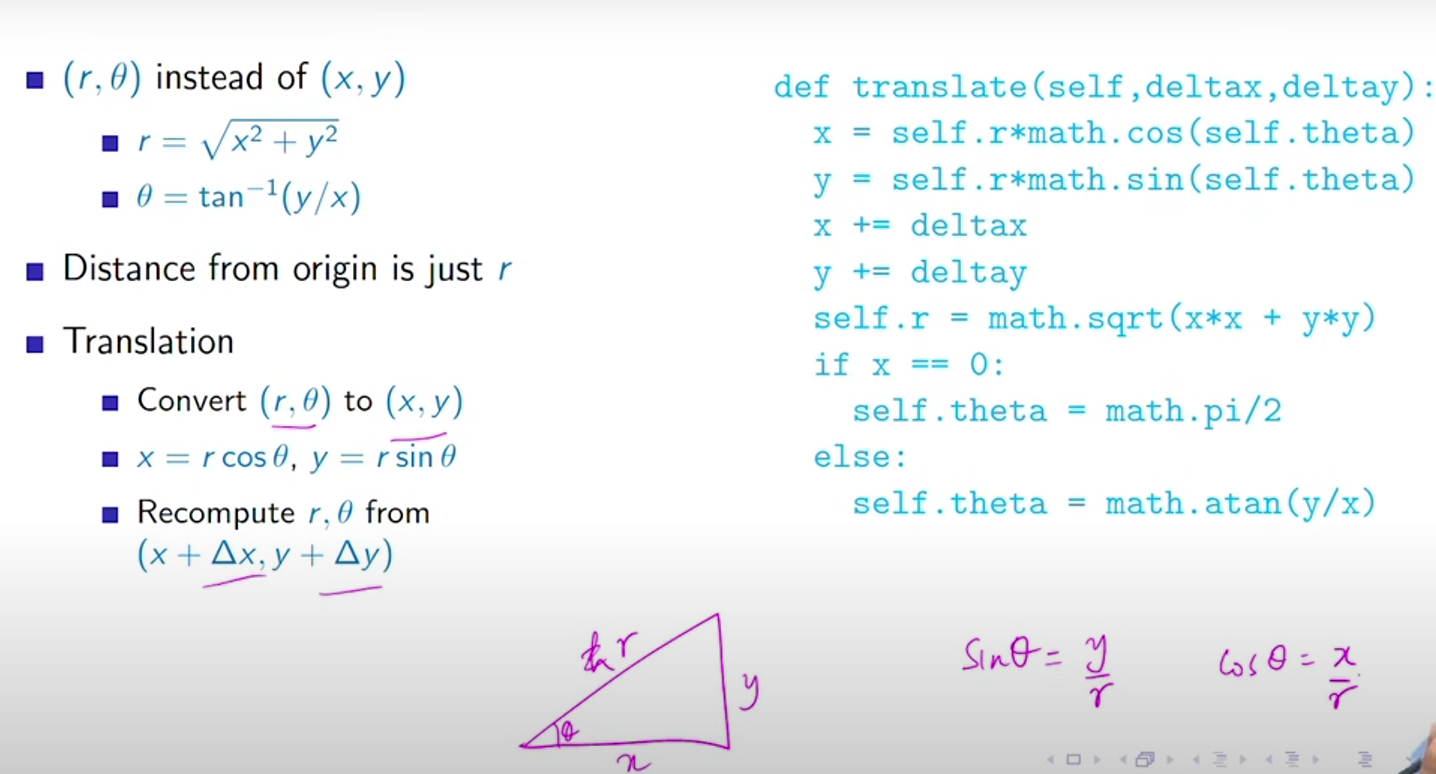

In [57]:
class PolarPoint:
    def __init__(self, a=0, b=0):
        self.r = math.sqrt(a*a + b*b)
        if a == 0:
            self.theta = math.pi /2
        else:
            self.theta = math.atan(b/a)

    def odistance(self):
        return self.r

    def translate(self, deltax, deltay):
        x = self.r * math.cos(self.theta)
        y = self.r * math.sin(self.theta)
        x += deltax
        y += deltay
        self.r = math.sqrt(x * x + y * y)
        if x == 0:
            self.theta = math.pi / 2
        else:
            self.theta = math.atan(y / x)

### 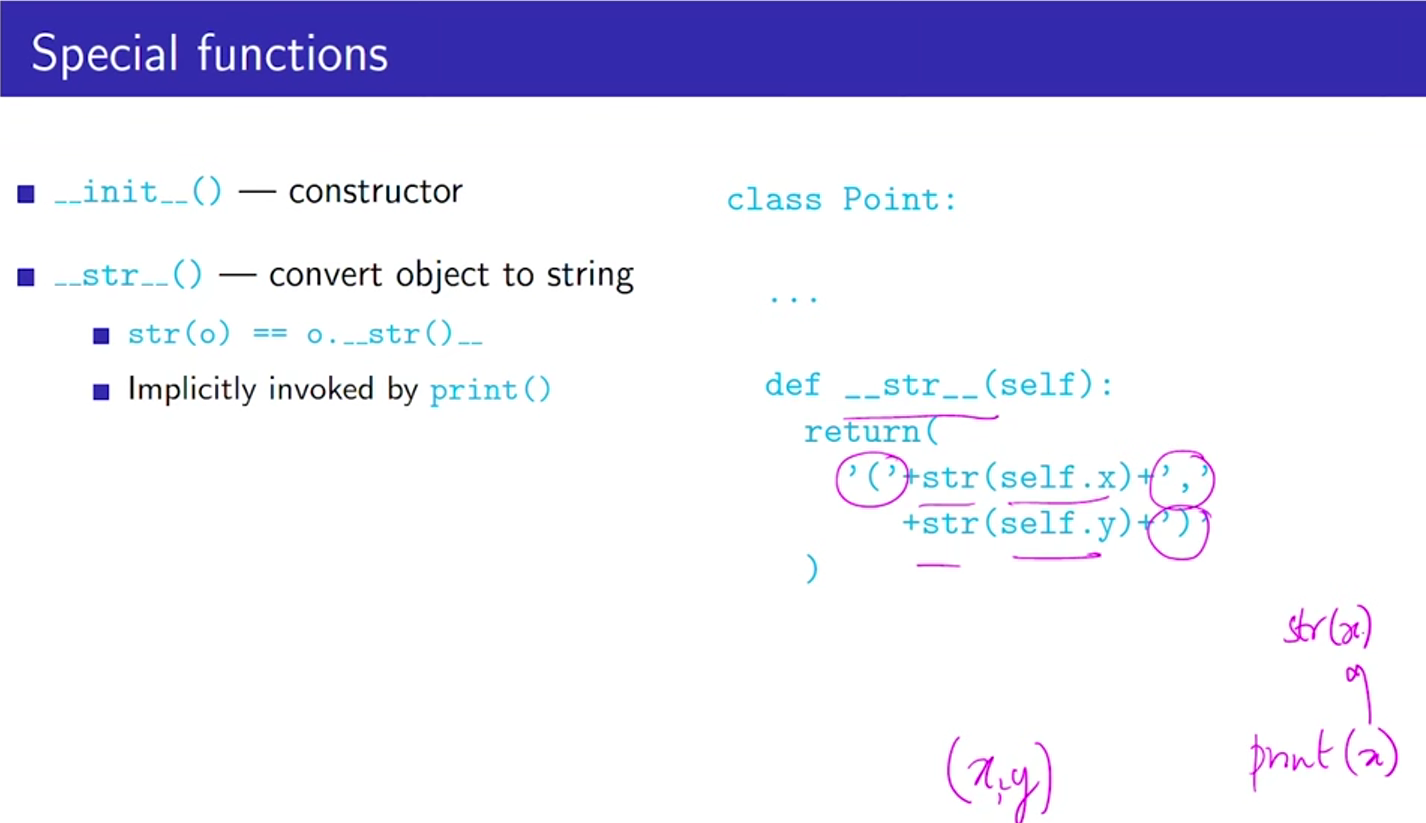
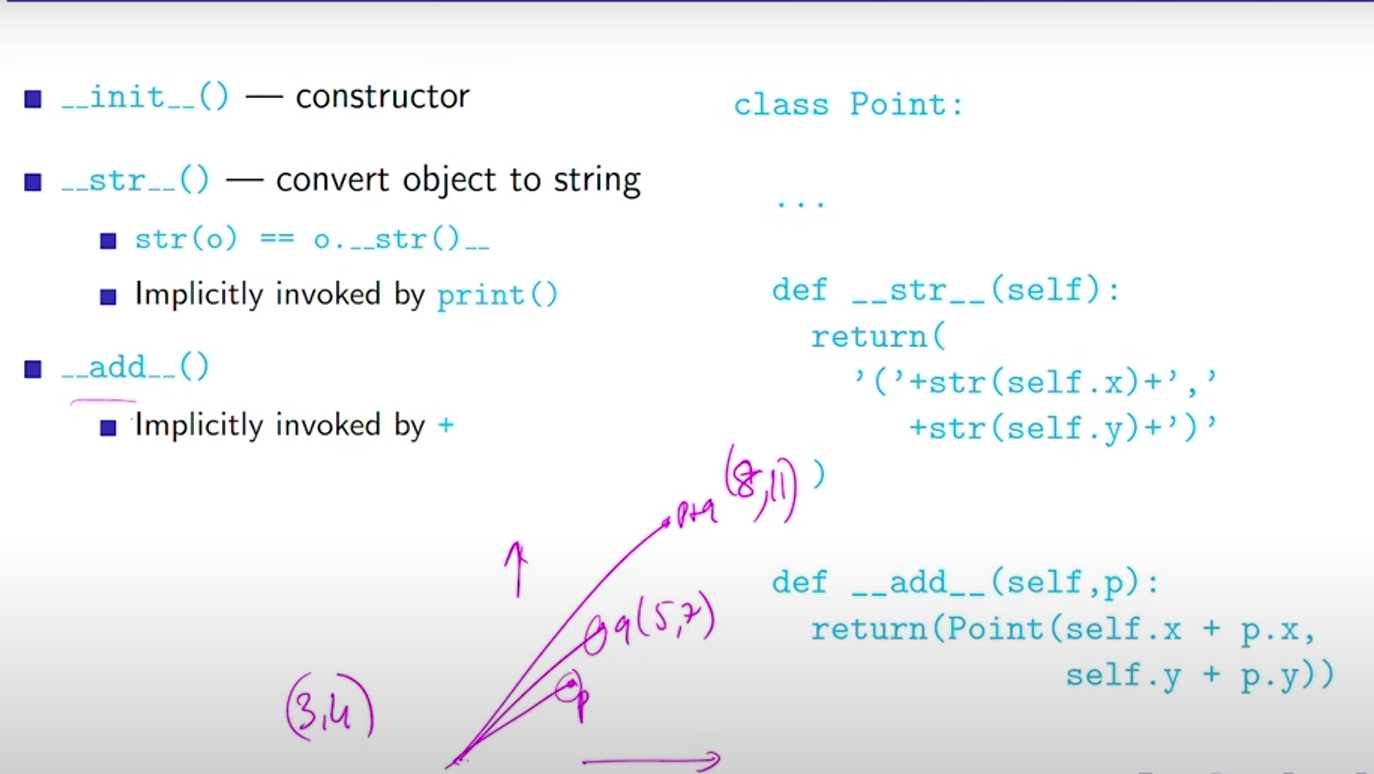

In [68]:
class PolarPoint:
    def __init__(self, a=0, b=0):
        self.r = math.sqrt(a*a + b*b)
        if a == 0:
            self.theta = math.pi /2
        else:
            self.theta = math.atan(b/a)

    def odistance(self):
        return self.r

    def translate(self, deltax, deltay):
        x = self.r * math.cos(self.theta)
        y = self.r * math.sin(self.theta)
        x += deltax
        y += deltay
        self.r = math.sqrt(x * x + y * y)
        if x == 0:
            self.theta = math.pi / 2
        else:
            self.theta = math.atan(y / x)

    def __str__(self):
        self.x = self.r * math.cos(self.theta)
        self.y = self.r * math.sin(self.theta)
        return "(" + str(self.x) + "," + str(self.y) + ")"

    def __add__(self, p):
        self.x = self.r * math.cos(self.theta)
        self.y = self.r * math.sin(self.theta)
        p.x = p.r * math.cos(p.theta)
        p.y = p.r * math.sin(p.theta)
        return PolarPoint(self.x + p.x, self.y + p.y)

In [69]:
point = PolarPoint(3,4)
print(point)

(3.0000000000000004,3.9999999999999996)


In [71]:
p1 = PolarPoint(3,4)
p2 = PolarPoint(4,5)
print(p1 + p2)

(7.000000000000001,8.999999999999998)
